In [1]:
import pandas as pd
import numpy as np

#arquivo csv é necessário fazer alguns tratamentos: 
#primeiro separador de colunas é ','; 
#descobrir o encoding; 
#trocar a ',' na coluna altura por '.'
#tirar o espaço da coluna "AlTURA"
mundial_14 = pd.read_csv(r'Mundial 2014.csv',sep= ',',encoding='latin1',skipinitialspace = True, thousands = '.', decimal = ',', dtype ={'ALTURA':np.float64})
display(mundial_14)

,Nº,NOME,IDADE,ALTURA,POSIÇÃO
0,1,Fabiana,29,1.93,Meio de rede
1,3,Dani Lins,29,1.81,Levantadora
2,4,Carol,23,1.83,Meio de rede
3,5,Adenizia,27,1.85,Meio de rede
4,6,Thaisa,27,1.96,Meio de rede
5,8,Jaqueline,30,1.86,Ponteira
6,10,Gabriela,20,1.80,Ponteira
7,11,Tandara,25,1.84,Oposto
8,12,Natália,25,1.86,Ponteira
9,13,Sheilla,31,1.85,Oposto


Text(0.5, 1.0, 'Mundial 2014 - Altura')

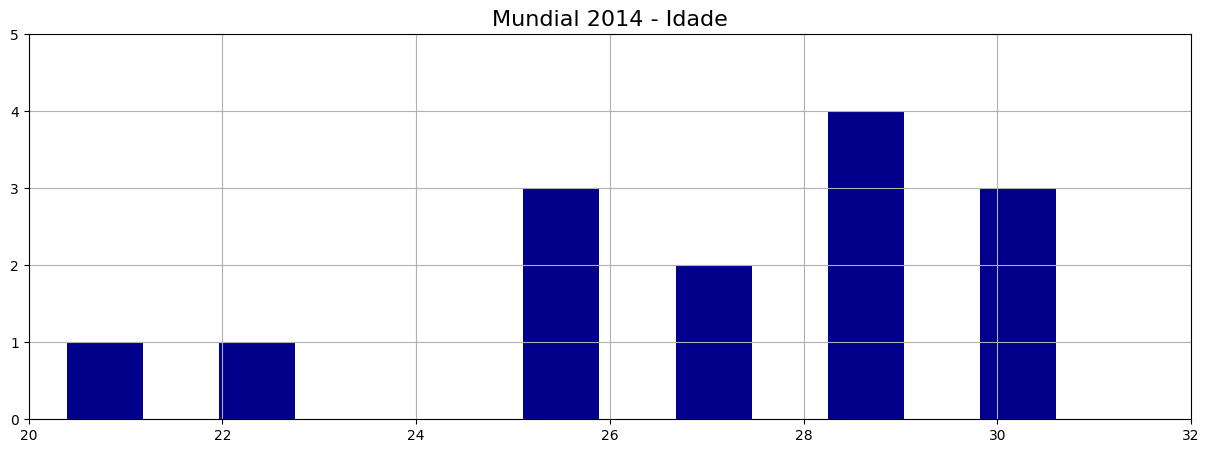

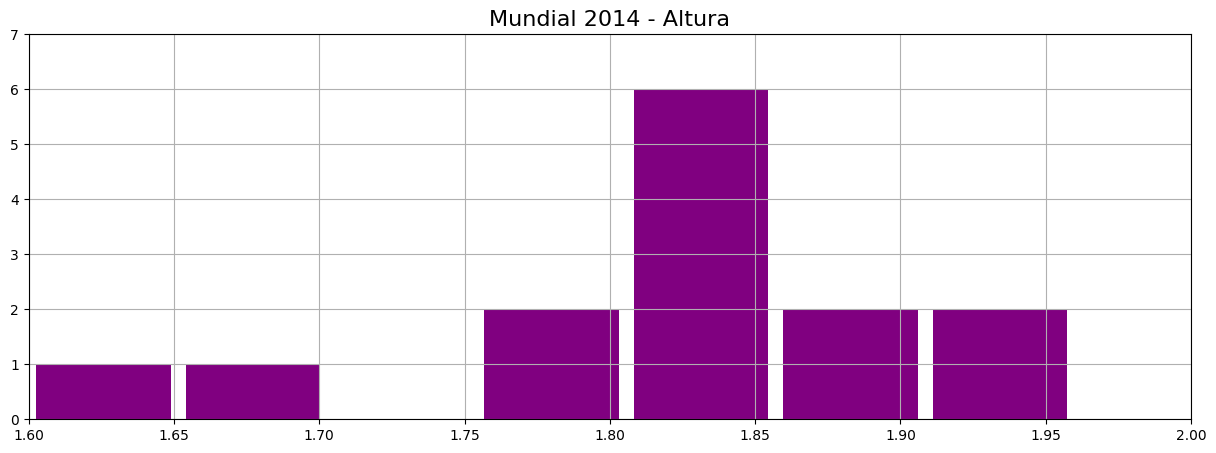

In [2]:
#contagem de idade e altura
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
mundial_14['IDADE'].hist(bins=7, rwidth=0.50, color="darkblue")
plt.xlim(20,32) 
plt.ylim(0,5)
plt.title("Mundial 2014 - Idade", fontsize = 16)

plt.figure(figsize=(15,5))
mundial_14['ALTURA'].hist(bins=7, rwidth=0.90, color="purple")
plt.xlim(1.60,2.00) 
plt.ylim(0,7)
plt.title("Mundial 2014 - Altura", fontsize = 16)

In [3]:
##qtde por posição
mundial_14['POSIÇÃO'].value_counts()

Meio de rede    4
Ponteira        4
Levantadora     2
Oposto          2
Líbero          2
Name: POSIÇÃO, dtype: int64

In [4]:
#média de altura
round(mundial_14.ALTURA.mean(), 2)

1.82

In [5]:
#média de idade
round(mundial_14.IDADE.mean(), 2)

27.07

In [6]:
#ordenar por jogadora mais velha
mundial_14.groupby('NOME')['IDADE'].max().sort_values(ascending=False)

NOME
Fabíola      31
Sheilla      31
Jaqueline    30
Dani Lins    29
Fabiana      29
Leia         29
Fê Garay     28
Adenizia     27
Thaisa       27
C. Brait     25
Natália      25
Tandara      25
Carol        23
Gabriela     20
Name: IDADE, dtype: int64

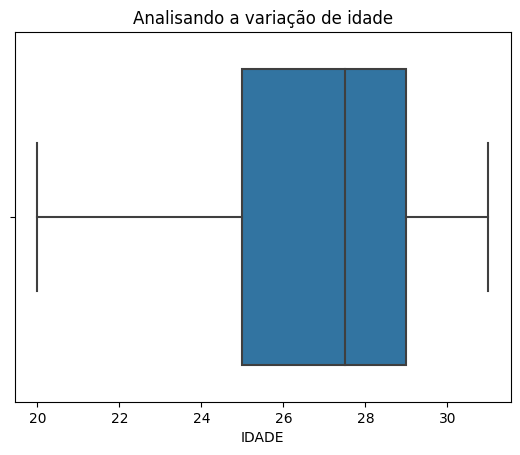

In [14]:
import seaborn as sns

# Analise grafica
plt.title('Analisando a variação de idade')
sns.boxplot(data=mundial_14, x='IDADE');

In [7]:
#ordenar por jogadora mais alta
mundial_14.groupby('NOME')['ALTURA'].max().sort_values(ascending=False)

NOME
Thaisa       1.96
Fabiana      1.93
Jaqueline    1.86
Natália      1.86
Adenizia     1.85
Sheilla      1.85
Fabíola      1.84
Tandara      1.84
Carol        1.83
Dani Lins    1.81
Gabriela     1.80
Fê Garay     1.79
C. Brait     1.70
Leia         1.60
Name: ALTURA, dtype: float64

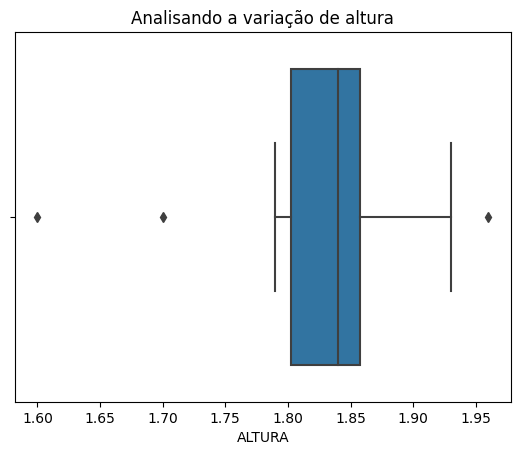

In [16]:
# Analise grafica
plt.title('Analisando a variação de altura')
sns.boxplot(data=mundial_14, x='ALTURA');

In [8]:
#média de altura por posição
mundial_14.groupby('POSIÇÃO')['ALTURA'].mean().sort_values(ascending=False).round(2)

POSIÇÃO
Meio de rede    1.89
Oposto          1.85
Ponteira        1.83
Levantadora     1.83
Líbero          1.65
Name: ALTURA, dtype: float64

In [9]:
#média de idade por posição
mundial_14.groupby('POSIÇÃO')['IDADE'].mean().sort_values(ascending=False).round(2)

POSIÇÃO
Levantadora     30.00
Oposto          28.00
Líbero          27.00
Meio de rede    26.50
Ponteira        25.75
Name: IDADE, dtype: float64

(20.0, 32.0)

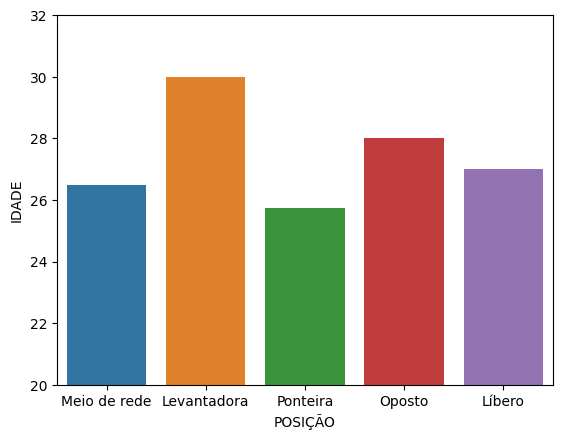

In [10]:
#média de idade por posição
mundial_14.groupby('POSIÇÃO')['IDADE'].mean()
media_idade = sns.barplot(x='POSIÇÃO', y='IDADE', data=mundial_14, ci=None)
media_idade.set_ylim(20,32)

(1.6, 1.95)

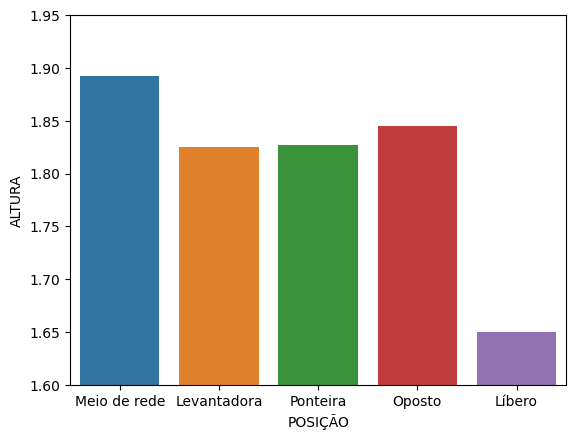

In [11]:
#média de altura por posição
mundial_14.groupby('POSIÇÃO')['ALTURA'].mean()
media_altura = sns.barplot(x='POSIÇÃO', y='ALTURA', data=mundial_14, ci=None)
media_altura.set_ylim(1.60, 1.95)

In [12]:
#criando coluna para mostrar novatas e experientes(novatas <= 25)
import sys

mundial_14['FAIXA ETÁRIA']=pd.cut(
    mundial_14['IDADE'],
    bins=[0, 25, sys.maxsize],
    labels=['Novata', 'Experiente']

)

mundial_14

,Nº,NOME,IDADE,ALTURA,POSIÇÃO,FAIXA ETÁRIA
0,1,Fabiana,29,1.93,Meio de rede,Experiente
1,3,Dani Lins,29,1.81,Levantadora,Experiente
2,4,Carol,23,1.83,Meio de rede,Novata
3,5,Adenizia,27,1.85,Meio de rede,Experiente
4,6,Thaisa,27,1.96,Meio de rede,Experiente
5,8,Jaqueline,30,1.86,Ponteira,Experiente
6,10,Gabriela,20,1.80,Ponteira,Novata
7,11,Tandara,25,1.84,Oposto,Novata
8,12,Natália,25,1.86,Ponteira,Novata
9,13,Sheilla,31,1.85,Oposto,Experiente


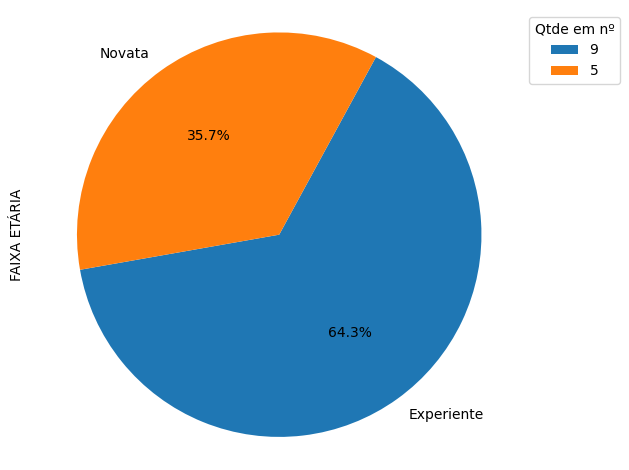

In [13]:
mundial_14['FAIXA ETÁRIA'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=190)
plt.legend(mundial_14['FAIXA ETÁRIA'].value_counts(), title="Qtde em nº",  bbox_to_anchor=(1, 1))
plt.axis('equal')
plt.tight_layout()